In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv(
    Path("Resources/lending_data.csv")
)

# Review the DataFrame
display(lending_df.head())
display(lending_df.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

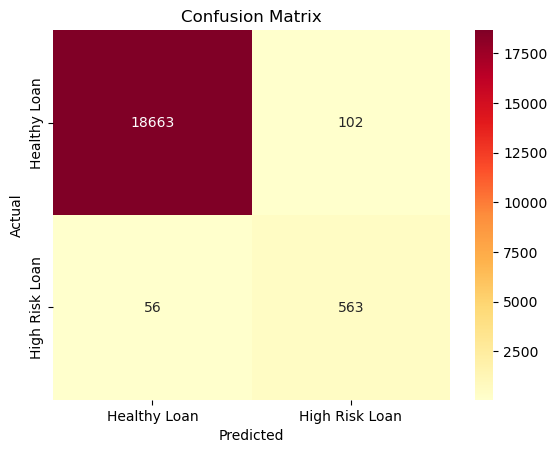

In [17]:
# Generate a confusion matrix for the model

import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
testing_matrix = confusion_matrix(y_test, testing_predictions)

# Define class labels for your problem (e.g., "Positive" and "Negative")
class_labels = ["Healthy Loan", "High Risk Loan"]

# Create a heatmap
sns.heatmap(testing_matrix, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [19]:
# Identify elements of confusion matrix
TP = testing_matrix[1, 1]  # True Positives
TN = testing_matrix[0, 0]  # True Negatives
FP = testing_matrix[0, 1]  # False Positives
FN = testing_matrix[1, 0]  # False Negatives

# Print elements of confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 563
True Negatives (TN): 18663
False Positives (FP): 102
False Negatives (FN): 56


In [18]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions, target_names=['Healthy loan (0)', 'High Risk Loan (1)'])
print(testing_report)

                    precision    recall  f1-score   support

  Healthy loan (0)       1.00      0.99      1.00     18765
High Risk Loan (1)       0.85      0.91      0.88       619

          accuracy                           0.99     19384
         macro avg       0.92      0.95      0.94     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Overall, the model appears to perform well in predicting both healthy loans and high-risk loans. The precision for high-risk loans is 0.85, indicating the model makes fewer false positive predictions for high-risk loans. Recall for high-risk loans is 0.91 suggesting that the model effectively captures a significant proportion of high-risk loans. Accuracy of the model is 0.99 showing that the overall model has a high accuracy for predicting both healthy and high-risk loans.

---